Based on https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460

In [1]:
## Load the packages we'll need

## for data handling 
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt #will use to visualize the result of our n-gram ranking
import seaborn as sns

sns.set_style("white")

## natural language processing: n-gram ranking
import re #for regex = regular expression?
import unicodedata
import nltk # to help with parsing the text and cleaning them up a bit
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = [] # stop words = words to ignore; list of strings

In [2]:
df = pd.read_csv("salted-tahini-chocolate-chip-cookies.csv")
df.head()

,userDisplayName,commentBody
0,lmk,Yum. These took much longer than 16 minutes t...
1,Sonya,If you follow the recipe as written the tahini...
2,KV,I have made these cookies 5 times. My advice i...
3,MaryN,I liked this- the tahini is slightly more subt...
4,Maggie B,Used Shaila M's tweaks. Baked first tray strai...


In [3]:
## basic cleaning of the data

# input = a list of words or text
# output a cleaner list of words
def basic_clean(text): # text is a string
    """
    A simple function to clean up the data. All the words that are not
    designated as a stop word are then lemmatized after encoding and
    basic regex parsing is performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text) # normalization
            .encode('ascii', 'ignore') # encoding
            .decode('utf-8', 'ignore') # decoding
            .lower()) # lowercasing
    words = re.sub(r'[^\w\s]', '', text).split()
    # lemmatization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]
    

In [4]:
basic_clean('cookies')

['cooky']

In [5]:
df[df['commentBody'].str.contains('cooky')]

,userDisplayName,commentBody


In [6]:
df['commentBody'].str.find('cooky',start=0,end=None)

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
350   -1
351   -1
352   -1
353   -1
354   -1
Name: commentBody, Length: 355, dtype: int64

In [7]:
df['commentBody'].tolist()[0]

"Yum.  These took much longer than 16 minutes to cook - but I'm also in Denver (5000+ ft. altitude) and used a gluten free flour blend.  Either or both of those could have affected the outcome."

In [8]:
## call the basic_clean() function to process the 'text' column
## of the dataframe df, first making it a simple list of words
## using tolist()
## assign the output of basic_clean() to words

words = basic_clean(''.join(str(df['commentBody'].tolist())))
# words = [basic_clean(df['commentBody'].tolist()[i]) for i in range(len(df))]


In [9]:
top_bigrams = pd.Series(nltk.ngrams(words, 2)).value_counts()[:12]
top_bigrams

(chocolate, chip)     62
(next, time)          33
(brown, sugar)        27
(12, hour)            21
(chip, cooky)         19
(tahini, flavor)      18
(dark, chocolate)     18
(chip, cookie)        17
(ice, cream)          17
(12, cup)             16
(20, minute)          16
(followed, recipe)    14
dtype: int64

cooky is the lemma for cookies...

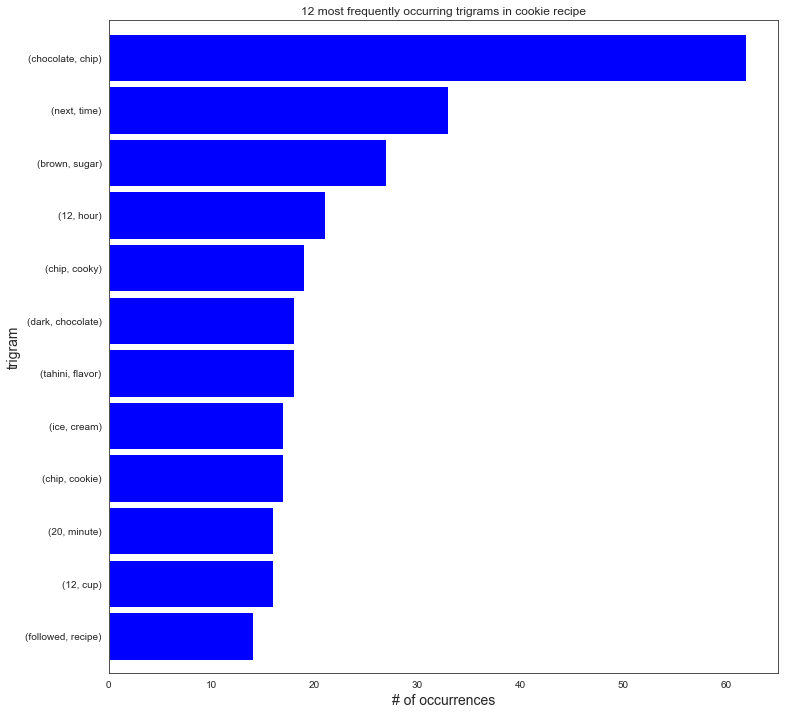

In [10]:
## graph the top trigrams
# sort_values() sorts the list with respect to something
# plot.barh() plots as a bargraph
top_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 12))

plt.xlabel('# of occurrences', fontsize = 14)
plt.ylabel('trigram', fontsize = 14)
plt.title('12 most frequently occurring trigrams in cookie recipe')
plt.show()

In [11]:
top_trigrams = pd.Series(nltk.ngrams(words, 3)).value_counts()[:12]
top_trigrams

(chocolate, chip, cooky)     15
(chocolate, chip, cookie)    14
(next, time, ill)             8
(ice, cream, scoop)           8
(chip, cookie, recipe)        7
(dark, chocolate, chip)       7
(sugar, 12, cup)              6
(2, whole, egg)               6
(matzo, cake, meal)           6
(wait, 12, hour)              5
(dark, brown, sugar)          5
(used, 2, whole)              5
dtype: int64

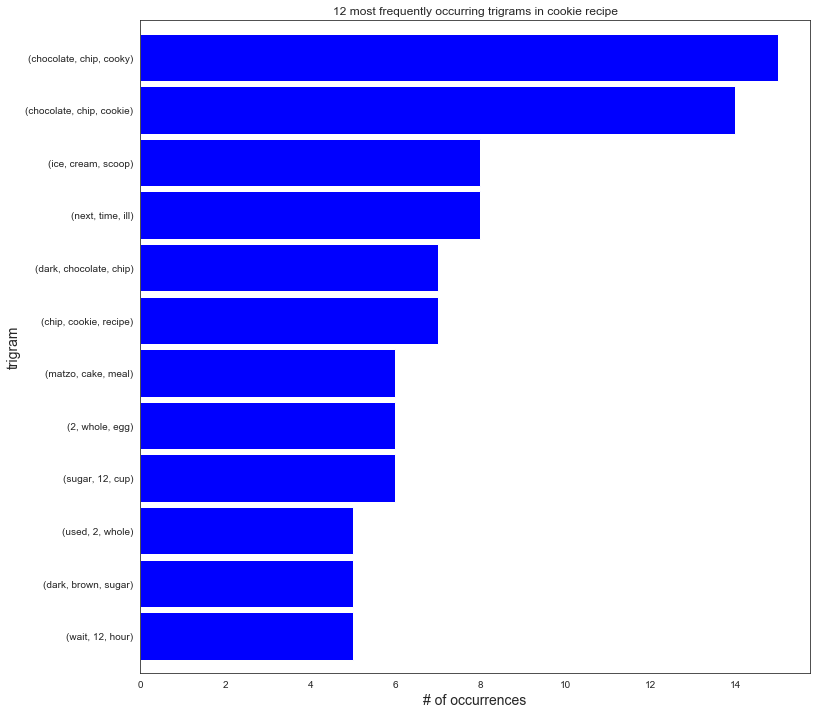

In [12]:
## graph the top trigrams
# sort_values() sorts the list with respect to something
# plot.barh() plots as a bargraph
top_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 12))

plt.xlabel('# of occurrences', fontsize = 14)
plt.ylabel('trigram', fontsize = 14)
plt.title('12 most frequently occurring trigrams in cookie recipe')
plt.show()

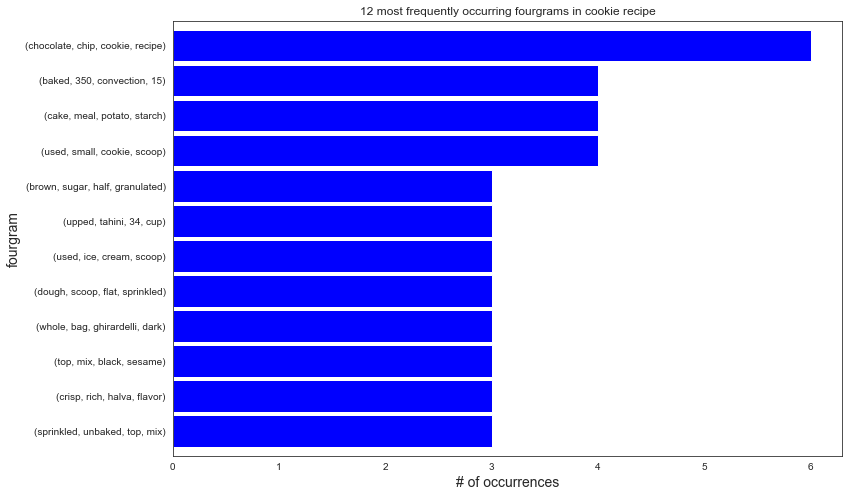

In [13]:
top_fourgrams = pd.Series(nltk.ngrams(words, 4)).value_counts()[:12]

top_fourgrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

plt.xlabel('# of occurrences', fontsize = 14)
plt.ylabel('fourgram', fontsize = 14)
plt.title('12 most frequently occurring fourgrams in cookie recipe')
plt.show()

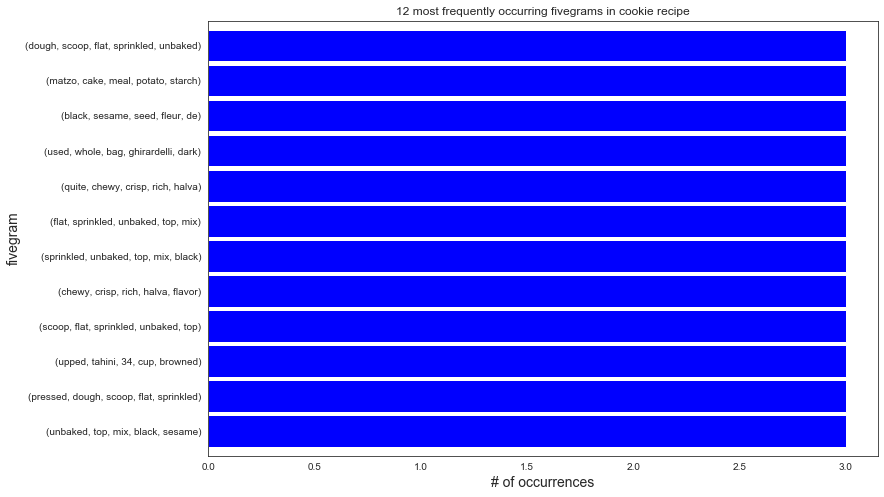

In [14]:
top_fivegrams = pd.Series(nltk.ngrams(words, 5)).value_counts()[:12]

top_fivegrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

plt.xlabel('# of occurrences', fontsize = 14)
plt.ylabel('fivegram', fontsize = 14)
plt.title('12 most frequently occurring fivegrams in cookie recipe')
plt.show()